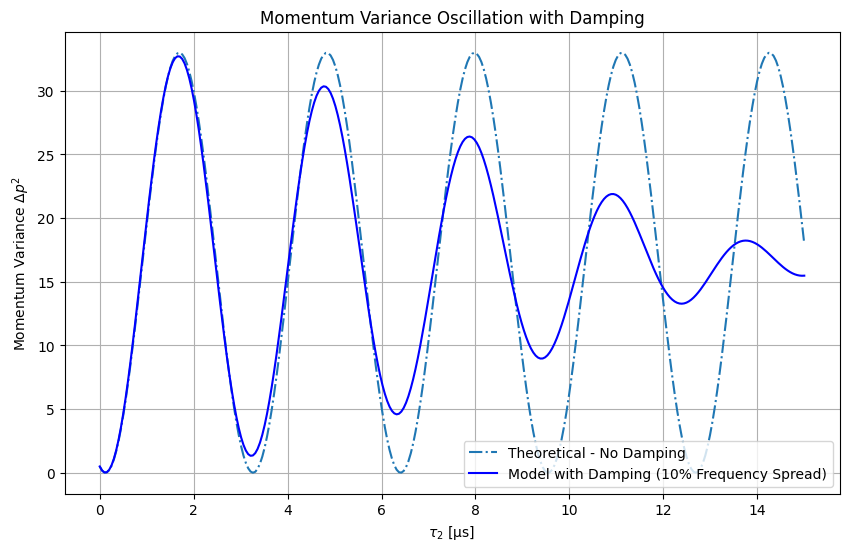

In [9]:
# Rayan Trabelsi

import numpy as np
import matplotlib.pyplot as plt

tau1 = 8  # tau1 value from the article in microseconds

tau2_vals = np.linspace(0, 15, 300)  # tau2 values (in microseconds)

omega_osc_center = 1.0  # normalized central frequency
frequency_spread = 0.1  # 10% spread

def momentum_variance(tau1, tau2, omega):
    phi = np.arctan2(2, omega*tau1)
    return 0.5 * (1 + (omega*tau1)**2/2 - omega*tau1*np.sqrt(1 + (omega*tau1)**2/4) *
                  np.cos(2*omega*tau2 - phi))

# theoretical without damping
variance_no_damping = momentum_variance(tau1, tau2_vals, omega_osc_center)

# averaged over frequency spread
omega_osc_vals = np.linspace(omega_osc_center * (1 - frequency_spread),
                            omega_osc_center * (1 + frequency_spread), 20)
variance_damped = np.mean([momentum_variance(tau1, tau2_vals, omega) for omega in omega_osc_vals], axis=0)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(tau2_vals, variance_no_damping, '-.', label="Theoretical - No Damping")
plt.plot(tau2_vals, variance_damped, '', label="Model with Damping (10% Frequency Spread)", color='blue')
plt.xlabel(r"$\tau_2$ [μs]")
plt.ylabel(r"Momentum Variance $\Delta p^2$")
plt.title("Momentum Variance Oscillation with Damping")
plt.legend()
plt.grid(True)
plt.show()